In [ ]:
import pandas as pd
import nltk
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams as bg
import re
import wordcloud as wc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Twitter_data.csv')
print(data)

               Names                Dates  ... Polarity      Sentiment
0    farmingtonpatch  2020-12-21 23:18:43  ...      1.0  very_positive
1            anpara4  2020-12-21 23:15:34  ...      0.0        neutral
2            mdakito  2020-12-21 23:14:22  ...      0.0        neutral
3     iam_eddiesmith  2020-12-21 23:13:37  ...      0.0        neutral
4        reverendlov  2020-12-21 23:13:15  ...     -0.6  very_negative
..               ...                  ...  ...      ...            ...
995          shabzen  2020-12-20 09:43:39  ...      0.2       positive
996   mariusbroodryk  2020-12-20 09:43:16  ...      0.2       positive
997         2karen21  2020-12-20 09:42:34  ...      0.5  very_positive
998       vojafakude  2020-12-20 09:42:26  ...      0.0        neutral
999        kxng__pin  2020-12-20 09:38:32  ...      0.2       positive

[1000 rows x 6 columns]


In [ ]:
print(data.Tweets)

0      ['the', 'shoprite', 'supermarket', 'chain', 'm...
1      ['i', 'cant', 'believe', 'i', 'missed', 'the',...
2      ['mynsfas', 'do', 'the', 'same', 'for', 'unisa...
3      ['ableka', 'all', 'females', 'here', 'be', 'th...
4      ['wherermytacos', 'we', 'never', 'had', 'an', ...
                             ...                        
995    ['rt', 'vojafakude', 'tjraisibe', 'thokozanim1...
996    ['crimeairnetwork', 'sapoliceservice', 'traffi...
997    ['rt', 'qwazylindie', 'hey', 'blantyre', 'peop...
998    ['tjraisibe', 'thokozanim1', 'shabzen', 'i', '...
999    ['rt', 'qwazylindie', 'hey', 'blantyre', 'peop...
Name: Tweets, Length: 1000, dtype: object


In [ ]:
top_tweeps=data['Names'].value_counts().head(n=10)
print(top_tweeps)

shoprite_sa        29
papizwane           7
p_phumo             5
destinychisom3      4
uchehone            3
shattachelsea       3
allie_phelan9       3
olivorang           3
ulstercounty911     3
marksun1962         3
Name: Names, dtype: int64


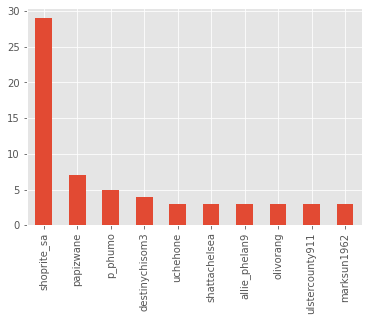

In [ ]:
 party_cnt = top_tweeps
 
 
 
 
plt.style.use('ggplot')
 
 
party_cnt.plot(kind ='bar')
 
 
plt.show()

Text(0.5, 1.0, 'Tweets Polarity')

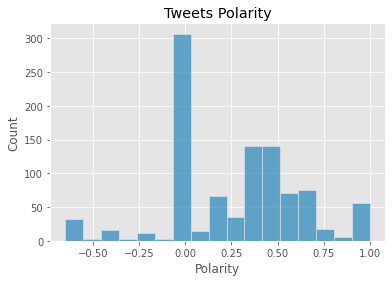

In [ ]:
 
sns.histplot(data['Polarity'])
plt.title('Tweets Polarity')

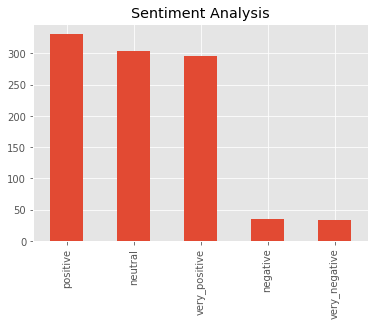

In [ ]:
 
party_cnt = data['Sentiment'].value_counts()
 
 
 
 
plt.style.use('ggplot')
 
 
party_cnt.plot(kind ='bar')
plt.title('Sentiment Analysis')
 
plt.show()

In [ ]:
print(data.columns)

Index(['Names', 'Dates', 'Locations', 'Tweets', 'Polarity', 'Sentiment'], dtype='object')


In [ ]:
data['Tweets']=data.Tweets.replace(to_replace='rt', value='',regex=True)
print(data['Tweets'])

0      ['the', 'shoprite', 'supermarket', 'chain', 'm...
1      ['i', 'cant', 'believe', 'i', 'missed', 'the',...
2      ['mynsfas', 'do', 'the', 'same', 'for', 'unisa...
3      ['ableka', 'all', 'females', 'here', 'be', 'th...
4      ['wherermytacos', 'we', 'never', 'had', 'an', ...
                             ...                        
995    ['', 'vojafakude', 'tjraisibe', 'thokozanim1',...
996    ['crimeairnetwork', 'sapoliceservice', 'traffi...
997    ['', 'qwazylindie', 'hey', 'blantyre', 'people...
998    ['tjraisibe', 'thokozanim1', 'shabzen', 'i', '...
999    ['', 'qwazylindie', 'hey', 'blantyre', 'people...
Name: Tweets, Length: 1000, dtype: object


In [ ]:
data['Tweets'] = data['Tweets'].str[1:-1]
join=data['Tweets'].sum()
print(join)

'the', 'shoprite', 'supermarket', 'chain', 'monday', 'announced', 'a', 'panership', 'with', 'federal', 'agencies', 'to', 'distribute', 'the', 'coronavirus', 'v''i', 'cant', 'believe', 'i', 'missed', 'the', 'conjunction', 'bc', 'i', 'was', 'stuck', 'in', 'ducking', 'shoprite', 'for', '2', 'hours''mynsfas', 'do', 'the', 'same', 'for', 'unisa', 'please', 'we', 'tired', 'of', 'shoprite', 'checkers', 'you', 'even', 'afraid', 'to', 'go', 'to', 'take', 'youre', 'money', 'beca''ableka', 'all', 'females', 'here', 'be', 'the', 'second', 'one', 'saying', 'real', 'yen', 'yen', 'until', 'its', 'time', 'to', 'enter', 'keke', 'napep', 'or', 'korope', 'to', 'shoprite''wherermytacos', 'we', 'never', 'had', 'an', 'aldi', 'here', 'till', 'recently', 'we', 'only', 'had', 'shoprite', 'pathmark', 'acme', 'aampp', 'and', 'a', 'bunch', 'of', 's''the', 'shoprite', 'supermarket', 'chain', 'monday', 'announced', 'a', 'panership', 'with', 'federal', 'agencies', 'to', 'distribute', 'the', 'coronavirus', 'v''the', 

In [ ]:
print(len(join))

143478


In [ ]:
join3=str(join.lower())
print((join3))
join4=('').join(join3)
print(join4)

'the', 'shoprite', 'supermarket', 'chain', 'monday', 'announced', 'a', 'panership', 'with', 'federal', 'agencies', 'to', 'distribute', 'the', 'coronavirus', 'v''i', 'cant', 'believe', 'i', 'missed', 'the', 'conjunction', 'bc', 'i', 'was', 'stuck', 'in', 'ducking', 'shoprite', 'for', '2', 'hours''mynsfas', 'do', 'the', 'same', 'for', 'unisa', 'please', 'we', 'tired', 'of', 'shoprite', 'checkers', 'you', 'even', 'afraid', 'to', 'go', 'to', 'take', 'youre', 'money', 'beca''ableka', 'all', 'females', 'here', 'be', 'the', 'second', 'one', 'saying', 'real', 'yen', 'yen', 'until', 'its', 'time', 'to', 'enter', 'keke', 'napep', 'or', 'korope', 'to', 'shoprite''wherermytacos', 'we', 'never', 'had', 'an', 'aldi', 'here', 'till', 'recently', 'we', 'only', 'had', 'shoprite', 'pathmark', 'acme', 'aampp', 'and', 'a', 'bunch', 'of', 's''the', 'shoprite', 'supermarket', 'chain', 'monday', 'announced', 'a', 'panership', 'with', 'federal', 'agencies', 'to', 'distribute', 'the', 'coronavirus', 'v''the', 

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
stop_words.append("'the")
stop_words.append("'")
stop_words.append(",")
stop_words.append("'with")
stop_words.append("'a")
stop_words.append("'to")
stop_words.append("''")
stop_words.append("'i")
stop_words.append("'and")
#stop_words.append("'shoprite")
 
stop_words.append("'rd")
stop_words.append("'for")# View a few words from the set
print(len(stop_words))

190


In [ ]:
sw=[]
for s in stop_words:
    #print(s)
    word1="'" + str(s)
    #print (word1)
    sw.append(word1)
print(sw)
word2="'" + str(sw)
print(word2)

["'i", "'me", "'my", "'myself", "'we", "'our", "'ours", "'ourselves", "'you", "'you're", "'you've", "'you'll", "'you'd", "'your", "'yours", "'yourself", "'yourselves", "'he", "'him", "'his", "'himself", "'she", "'she's", "'her", "'hers", "'herself", "'it", "'it's", "'its", "'itself", "'they", "'them", "'their", "'theirs", "'themselves", "'what", "'which", "'who", "'whom", "'this", "'that", "'that'll", "'these", "'those", "'am", "'is", "'are", "'was", "'were", "'be", "'been", "'being", "'have", "'has", "'had", "'having", "'do", "'does", "'did", "'doing", "'a", "'an", "'the", "'and", "'but", "'if", "'or", "'because", "'as", "'until", "'while", "'of", "'at", "'by", "'for", "'with", "'about", "'against", "'between", "'into", "'through", "'during", "'before", "'after", "'above", "'below", "'to", "'from", "'up", "'down", "'in", "'out", "'on", "'off", "'over", "'under", "'again", "'further", "'then", "'once", "'here", "'there", "'when", "'where", "'why", "'how", "'all", "'any", "'both", "'eac

In [ ]:
text_tokens = word_tokenize(join4)

In [ ]:
print(text_tokens)

["'the", "'", ',', "'shoprite", "'", ',', "'supermarket", "'", ',', "'chain", "'", ',', "'monday", "'", ',', "'announced", "'", ',', "'a", "'", ',', "'panership", "'", ',', "'with", "'", ',', "'federal", "'", ',', "'agencies", "'", ',', "'to", "'", ',', "'distribute", "'", ',', "'the", "'", ',', "'coronavirus", "'", ',', "'v", "''", 'i', "'", ',', "'cant", "'", ',', "'believe", "'", ',', "'i", "'", ',', "'missed", "'", ',', "'the", "'", ',', "'conjunction", "'", ',', "'bc", "'", ',', "'i", "'", ',', "'was", "'", ',', "'stuck", "'", ',', "'in", "'", ',', "'ducking", "'", ',', "'shoprite", "'", ',', "'for", "'", ',', "'2", "'", ',', "'hours", "''", 'mynsfas', "'", ',', "'do", "'", ',', "'the", "'", ',', "'same", "'", ',', "'for", "'", ',', "'unisa", "'", ',', "'please", "'", ',', "'we", "'", ',', "'tired", "'", ',', "'of", "'", ',', "'shoprite", "'", ',', "'checkers", "'", ',', "'you", "'", ',', "'even", "'", ',', "'afraid", "'", ',', "'to", "'", ',', "'go", "'", ',', "'to", "'", ',', "'

In [ ]:
tokens_without_sw = [word for word in text_tokens if not word in word2]
 
print(tokens_without_sw)

["'shoprite", "'supermarket", "'chain", "'monday", "'announced", "'panership", "'federal", "'agencies", "'distribute", "'coronavirus", "'cant", "'believe", "'missed", "'conjunction", "'bc", "'stuck", "'ducking", "'shoprite", "'2", "'hours", 'mynsfas', "'unisa", "'please", "'tired", "'shoprite", "'checkers", "'even", "'afraid", "'go", "'take", "'youre", "'money", 'ableka', "'females", "'second", "'one", "'saying", "'real", "'yen", "'yen", "'time", "'enter", "'keke", "'napep", "'korope", "'shoprite", 'wherermytacos', "'never", "'aldi", "'till", "'recently", "'shoprite", "'pathmark", "'acme", "'aampp", "'bunch", "'shoprite", "'supermarket", "'chain", "'monday", "'announced", "'panership", "'federal", "'agencies", "'distribute", "'coronavirus", "'shoprite", "'supermarket", "'chain", "'monday", "'announced", "'panership", "'federal", "'agencies", "'distribute", "'coronavirus", "'shoprite", "'supermarket", "'chain", "'monday", "'announced", "'panership", "'federal", "'agencies", "'distribute

In [ ]:
print(len(tokens_without_sw))

10039


In [ ]:
count=nltk.FreqDist(tokens_without_sw)
count1=count.most_common(50)
print (count1)

[("'shoprite", 681), ("'people", 83), ("'germiston", 77), ("'get", 75), ("'sell", 74), ("'made", 74), ("'checkers", 73), ("'bottle", 73), ("'nice", 70), ("'qwazylindie", 69), ("'hey", 69), ("'blantyre", 69), ("'k2000", 69), ("'deli", 69), ("'like", 68), ("'tasty", 68), ("'appetizing", 68), ("'aroma", 68), ("'achale", 68), ("'christmas", 61), ("'go", 59), ("'shop", 52), ("'went", 50), ("'shopritesa", 49), ("'pick", 48), ("'robbery", 47), ("'overflow", 44), ("'warehouse", 42), ("'lower", 42), ("'foods", 42), ("'whole", 42), ("'saw", 36), ("'im", 35), ("'coe", 34), ("'gp", 34), ('find', 34), ("'lastminute", 34), ("'dinner", 34), ("'additions", 34), ("'wegmans", 34), ("'mall", 33), ("'kids", 32), ("'almost", 32), ("'drinks", 31), ("'60", 30), ("'seconds", 30), ("'sctrolleydash", 30), ("'enter", 29), ("'thank", 29), ("'receiving", 29)]


In [ ]:
top=dict(sorted(count.items(),
                           key=lambda item:item[1],reverse=True))

In [ ]:
print(top.keys())
print(top.values())
word=top.keys()
count=top.values()

dict_keys(["'shoprite", "'people", "'germiston", "'get", "'sell", "'made", "'checkers", "'bottle", "'nice", "'qwazylindie", "'hey", "'blantyre", "'k2000", "'deli", "'like", "'tasty", "'appetizing", "'aroma", "'achale", "'christmas", "'go", "'shop", "'went", "'shopritesa", "'pick", "'robbery", "'overflow", "'warehouse", "'lower", "'foods", "'whole", "'saw", "'im", "'coe", "'gp", 'find', "'lastminute", "'dinner", "'additions", "'wegmans", "'mall", "'kids", "'almost", "'drinks", "'60", "'seconds", "'sctrolleydash", "'enter", "'thank", "'receiving", "'buying", "'armed", "'steeze1", "'days", "'10yrs", "'slaps", "'workers", "'crimeairnetwork", "'buy", "'mrpi", "'fanice", "'2", "'dont", "'time", "'stand", "'dress", "'shopping", "'condoms", "'please", "'multiple", "'perps", "'run", "'amp", "'got", "'one", 'shoprite', "'boys", "'dec", "'location", 'shopritesa', "'den", "'btsvnigeria", "'vday", "'nigeria", "'billboard", "'ad", "'displayed", "'30th", "'31st", "'insi", "'works", "'even", "'town", 

In [ ]:
  new_data= pd.DataFrame(count1,
                             columns=['words', 'count'])
print(new_data)

             words  count
0        'shoprite    681
1          'people     83
2       'germiston     77
3             'get     75
4            'sell     74
5            'made     74
6        'checkers     73
7          'bottle     73
8            'nice     70
9     'qwazylindie     69
10            'hey     69
11       'blantyre     69
12          'k2000     69
13           'deli     69
14           'like     68
15          'tasty     68
16     'appetizing     68
17          'aroma     68
18         'achale     68
19      'christmas     61
20             'go     59
21           'shop     52
22           'went     50
23     'shopritesa     49
24           'pick     48
25        'robbery     47
26       'overflow     44
27      'warehouse     42
28          'lower     42
29          'foods     42
30          'whole     42
31            'saw     36
32             'im     35
33            'coe     34
34             'gp     34
35            find     34
36     'lastminute     34
37         '

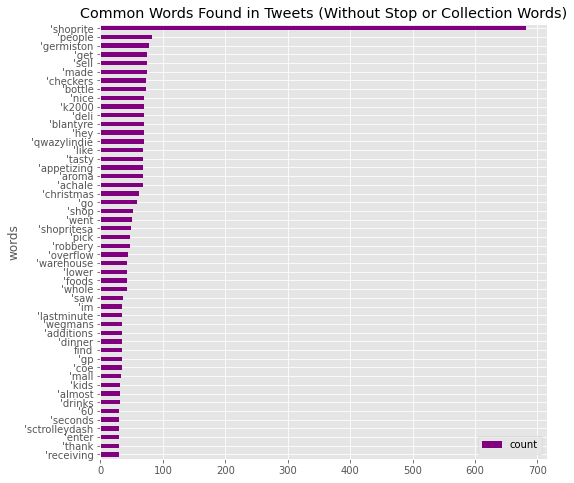

In [ ]:
 fig, ax = plt.subplots(figsize=(8, 8))
 
# Plot horizontal bar graph
new_data.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
 
ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")
 
plt.show()

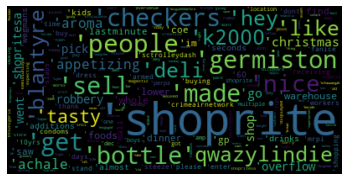

In [ ]:
 wordcloud = wc.WordCloud( background_color='black')
      
      
        
 
      
wordcloud.generate_from_frequencies(top)
         
      
plt.imshow(wordcloud, interpolation='bilInear')
      
      
plt.axis('off')
      
plt.show()